In [1]:
import random
import string
import numpy as np
import pandas
import time


# Create a list of 100000 name of 10 characters
random.seed(2)
names_unsrt = [''.join(random.choices(string.ascii_letters, k = 10)) for _ in range(100000)]

In [2]:
len(names_unsrt)

100000

In [3]:
names_unsrt[:5]

['XXceRMIqFF', 'EiwuLZXCxn', 'bbyqtUBDmb', 'qhAZJjUPMV', 'NPsZYiNLxB']

In [4]:
# Convert the list to a set
names_set = set(names_unsrt)
len(names_set)

100000

In [5]:
"""For this part of the assignment, I'll go ahead and use the quick sort algorithm to sort this list of 100000 elements
The reason why, is beause compare to all the algorithms we've been learning so far, the quicksort is by far the 
fastest algorithm with a time complexity of O(nlog(n))for the average case """

def quicksort(array):
    if len(array) < 2:
        return (array)
    else:
        # pivot == first element
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return (quicksort(less) + [pivot] + quicksort(greater))
    
start_time = time.clock()
names_srt = quicksort(names_unsrt)
end_time = time.clock()

# Run time
(end_time - start_time)*1000

396.4476

In [6]:
names_srt[:5]

['AABMAyWQDK', 'AACbyUDoyv', 'AACezyFOmJ', 'AAEzdIySoo', 'AAHZlIkays']

In [7]:
"""Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, 
and 100,000th positions, and store them in a temporary array somewhere for later use."""
# subtracting 1, because the index of a list starts at 0 not 1, so possition 10000 is actually at location array_unsrt[9999]
array_val = []
array_val.append(names_unsrt[10000-1])
array_val.append(names_unsrt[30000-1])
array_val.append(names_unsrt[50000-1])
array_val.append(names_unsrt[70000-1])
array_val.append(names_unsrt[90000-1])
array_val.append(names_unsrt[100000-1])

In [8]:
array_val

['RsCMRuOxUR',
 'piRvTqGJJf',
 'HfnbdeOhxM',
 'kjdFkEKvMY',
 'drCbpQrvek',
 'eyhJoTOUZh']

In [9]:
"""Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for 
the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all 
three algorithms"""

# linear search on the unsorted array
result_unsrt = []
def linear_search(list, item):
    start_time = time.clock()
    i = 0
    while i < len(list):
        if list[i] == item:
            # return if item is found
            end_time = time.clock()
            print(list[i])
            return (end_time - start_time)*1000
        else:
            i = i + 1
    end_time = time.clock()
    return (end_time - start_time)*1000

for f in array_val:
    result_unsrt.append(linear_search(names_unsrt, f))


RsCMRuOxUR
piRvTqGJJf
HfnbdeOhxM
kjdFkEKvMY
drCbpQrvek
eyhJoTOUZh


In [10]:
result_unsrt

[1.8262,
 6.644900000001286,
 10.088799999998344,
 17.13709999999935,
 20.91390000000004,
 22.522299999998552]

In [11]:
# Binary search for the sorted array
result_srt = []
def binary_search(list, item): 
    start_time = time.clock()
    # low and high keep track of which part of the list you'll search in. 
    low = 0 
    high = len(list) - 1
    
    # While you haven't narrowed it down to one element ... 
    while low <= high: 
        mid = (low + high) // 2 
        guess = list[mid] 
        # Found the item. 
        if guess == item: 
            end_time = time.clock()
            return (end_time - start_time)*1000
        # The guess was too high. 
        if guess > item: 
            high = mid - 1 
        else: 
            low = mid + 1 
    # Item doesn't exist 
    end_time = time.clock()
    return (end_time - start_time)*1000

for f in array_val:
    result_srt.append(binary_search(names_srt, f))

In [12]:
result_srt

[0.014999999997655777,
 0.009699999999668307,
 0.009300000002099296,
 0.010399999997190434,
 0.007899999999949614,
 0.007899999999949614]

In [13]:
# lookup for the same values in the set
result_set = []
for f in array_val:
    start_time = time.clock()
    if f in names_set:
        end_time = time.clock()
        result_set.append((end_time - start_time)*1000)

In [14]:
result_set

[0.001900000000887303,
 0.0008000000022434506,
 0.0007000000010748408,
 0.0005999999999062311,
 0.0004999999987376214,
 0.0005999999999062311]

In [15]:
# Create a table and plot comparing times of linear search, binary search and set lookup for the six names
result_table = pandas.DataFrame({"lookup_val":array_val})
result_table["Linear_Search"] = result_unsrt
result_table["Binary_Search"] = result_srt
result_table["Set_lookup"] = result_set
result_table

,lookup_val,Linear_Search,Binary_Search,Set_lookup
0,RsCMRuOxUR,1.8262,0.0150,0.0019
1,piRvTqGJJf,6.6449,0.0097,0.0008
2,HfnbdeOhxM,10.0888,0.0093,0.0007
3,kjdFkEKvMY,17.1371,0.0104,0.0006
4,drCbpQrvek,20.9139,0.0079,0.0005
5,eyhJoTOUZh,22.5223,0.0079,0.0006


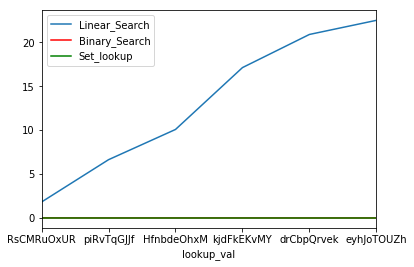

In [17]:
# Plot the results
import matplotlib.pyplot as plt
ax = plt.gca()
result_table.plot(x='lookup_val', y='Linear_Search', ax=ax)
result_table.plot(x='lookup_val', y='Binary_Search', color="red", ax=ax)
result_table.plot(x='lookup_val', y='Set_lookup', color="green", ax=ax)

plt.show()

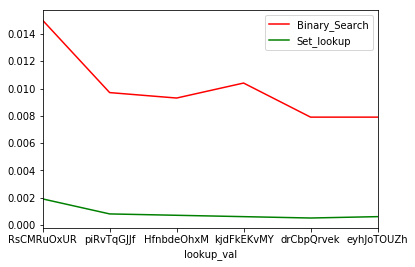

In [18]:
# Binary search vs set lookup
ax = plt.gca()
result_table.plot(x='lookup_val', y='Binary_Search', color="red", ax=ax)
result_table.plot(x='lookup_val', y='Set_lookup', color="green", ax=ax)

plt.show()

In [19]:
# Find the percentage difference of the results for linear search vs binary search
res_list = [result_unsrt[i] - result_srt[i] for i in range(len(result_unsrt))]
final_list = [(res_list[i] / result_unsrt[i])*100 for i in range(len(res_list))]
final_list

[99.17862227589225,
 99.85402338636148,
 99.9078185710679,
 99.9393129526163,
 99.96222607930635,
 99.96492365344591]

In [20]:
# Find the per diff of results for linear search vs set lookup
res_list = [result_unsrt[i] - result_set[i] for i in range(len(result_unsrt))]
final_list = [(res_list[i] / result_unsrt[i])*100 for i in range(len(res_list))]
final_list

[99.89595882154816,
 99.9879606916245,
 99.993061612867,
 99.996498824189,
 99.99760924553173,
 99.99733597367984]

### Executive Summary
We can clearly see the efficiency of Binary search and set lookup over linear search. With linear search, it doesn’t mater if the list is sorted or not, it will still take n time to find an element. Meaning, one needs to go through the list one by one until the lookup value is found. A closet examination of the result table prove this. The farthest the lookup value is in the list, the more time it will take to find it, hence O(n).
    Binary search is an improvement from linear search with a runtime of O(log(n)). There has been a 99% improvement with binary search. But even so, it is not as fast as set lookup with a runtime of O(1). Compare to the other two algorithms, set lookup doesn’t have to loop through a list to find a value. With key value operation (hash table), it knows exactly where everything is located, hence whatever you’re looking for you will get a O(1) time complexity.  
